In [1]:
#Some standard imports for all things python!
import numpy as np # For numerical operations
import scipy as sp # For scientific operations

import os
import subprocess
import sys
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker #For adjusting the location frequency of ticks
import matplotlib.image as mpimg
import matplotlib.animation as animation


/home/robert/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#In case you don't have the required packages, we can install them for you

try:
    from ase.io import read, write
    import ase
    import ase.visualize
except ImportError:
    print("No ASE found. Installing it now.")
    subprocess.run(["pip", "install", "ase"])
try:
    import pyGDM2
except ImportError:
    print("No GDM found. Installing it now.")
    subprocess.run(["pip", "install", "pyGDM2"])

In [3]:
#Now we add in those sub-modules that we have been developing
sys.path.insert(0, 'Light/'); sys.path.insert(0, 'Building/')

from Light import Spectra, Epsilon_ExpClass #For optical response with the pygdm package 

from Building.nano_oct import Nanoct 
from Building.nanodeca import Nanodeca
from Building.nanoico import Nanoalloy

In [4]:
#Nanoalloy.create_alloy_ico(['Cu','Au', "Pt"], 4, 3.65, "4_layers.xyz")

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [5]:
#Let's load in a frinedly little nanoparticle and visualize it
ag = read("Structures/Ag_Ih_2057.xyz")

ase.visualize.view(ag, viewer="x3d") #This is generally a good platform for visualisation

#Howeever, I would strongly recommend either Ovito, VMD, or Avogadro for more advanced visualisation

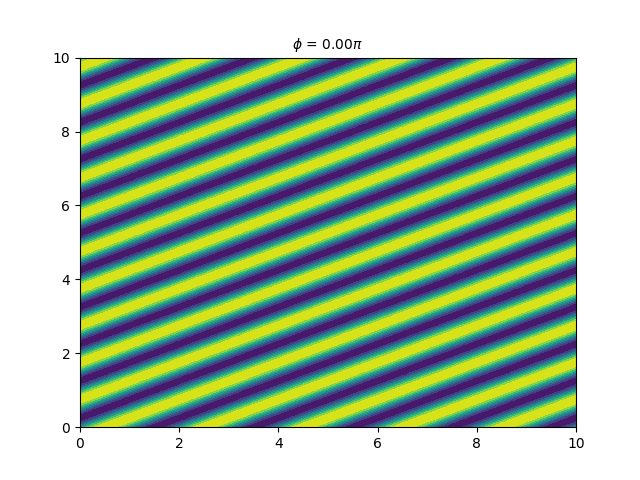

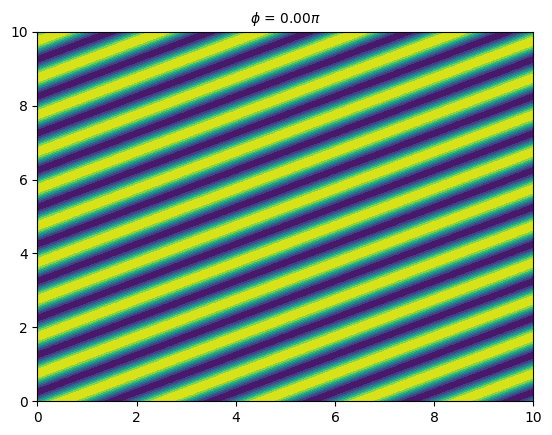

In [6]:
# Define the wave parameters
amplitude = 1.0
wavelength = 2.0
omega = 1.0
phi = 0.0

# Create a meshgrid for the xy plane
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
# Generate numbers from 1 to 10
times = np.linspace(0, 6 * np.pi, 75)
# Calculate the plane wave

#for phi in times:
#    Z = amplitude * np.sin(2 * np.pi * (X / wavelength - omega * Y) + phi)#
#
#    # Plot the plane wave
#    fig, ax = plt.subplots()
#    contour = ax.contourf(X, Y, Z, cmap='viridis')
#    fig.colorbar(contour)
#    plt.show()
    
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update the frame
def update(phi):
    Z = amplitude * np.sin(2 * np.pi * (X / wavelength - omega * Y) + phi)
    ax.clear()
    contour = ax.contourf(X, Y, Z, cmap='viridis')
    ax.text(0.5, 1.01, "$\phi$ = %.2f$\pi$"%(phi/np.pi), horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    return contour

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=times, blit=False)

# Save the animation as a gif
ani.save('plane_wave.gif', writer='imagemagick')

Image(filename="plane_wave.gif")


/home/robert/.local/lib/python3.10/site-packages/pyGDM2/tools.py:990: UserWarning: Mesh not detected, falling back to 'cubic'. mindist value = 9.102924468365021
  warnings.warn("Mesh not detected, falling back to 'cubic'. mindist value = {}".format(distsum))


structure initialization - automatic mesh detection: cube
structure initialization - consistency check: 2057/2057 dipoles valid


/home/robert/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/robert/.local/lib/python3.10/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


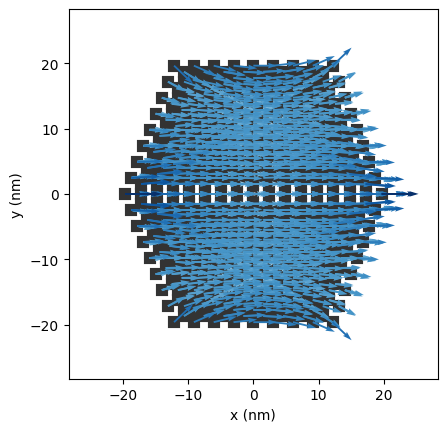

In [7]:
spec = Spectra.Spectrum("Structures/Ag_Ih_2057.xyz")

config 0 : {'theta': 0}


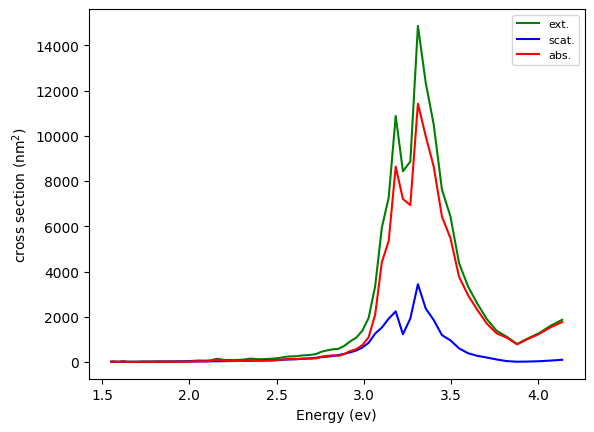

In [8]:
spec.Plot_Spectrum_En()

config 0 : {'theta': 0}


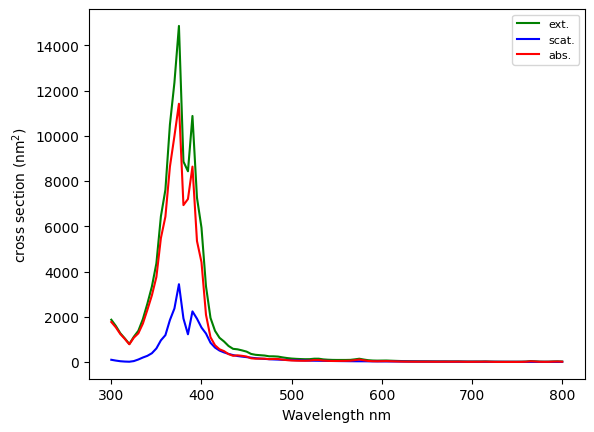

In [9]:
spec.Plot_Spectrum_Wl()